## 📊 Analyse des Données de Santé des Patients sur 10 Ans : Facteurs de Réadmission Hospitalière

Ce projet explore les données de Santé des Patients sur 10 Ans pour identifier les tendances clés, les évolutions des acteurs de Réadmission Hospitalière.

Dataset utilisé : `hospital_readmissions.csv`.

**Étape 1 – Chargement et exploration des données**

**Étape 2 : Nettoyage et préparation des données**

**Étape 3 : Analyses exploratoires pour identifier les tendances**

**Étape 4 : Visualisation des données**

**Étape 5 : Développement d'un dashboard Interactif avec le framework Streamlit**


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import mannwhitneyu
warnings.filterwarnings('ignore')

## Étape 1 – Chargement et exploration des données

In [2]:
# Chargement du dataset
df = pd.read_csv("hospital_readmissions.csv")
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [4]:
# Dimensions du dataset
print(f"\nNombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")


Nombre de lignes : 25000
Nombre de colonnes : 17


In [5]:
# Types de colonnes
print("\n--- Types de données ---")
print(df.info())


--- Types de données ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted    

In [6]:
# Recherche des lignes dupliquées
duplicates = df.duplicated()
print("Nombre total de lignes dupliquées :", duplicates.sum())

Nombre total de lignes dupliquées : 0


In [7]:
# Statistiques descriptives générales
print("\n--- Statistiques descriptives (numériques) ---")
df.describe()


--- Statistiques descriptives (numériques) ---


,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [8]:
# Statistiques pour les colonnes catégorielles
print("\n--- Statistiques descriptives (catégorielles) ---")
df.describe(include='object')


--- Statistiques descriptives (catégorielles) ---


,age,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,6,7,8,8,8,3,3,2,2,2
top,[70-80),Missing,Circulatory,Other,Other,no,no,no,yes,no
freq,6837,12382,7824,9056,9107,23625,20938,13497,19228,13246


In [9]:
#Répartition des réadmis
print('\nRépartition des réadmis :\n', df['readmitted'].value_counts())


Répartition des réadmis :
 readmitted
no     13246
yes    11754
Name: count, dtype: int64


##  Étape 2 : Nettoyage et préparation des données

In [10]:
# Valeurs manquantes
print("\n--- Valeurs manquantes ---")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)


--- Valeurs manquantes ---
Series([], dtype: int64)


##  Étape 3 : Analyses exploratoires pour identifier les tendances

In [11]:
# Calcul du nombre de patients par groupe d'âge
patients_par_age = df['age'].value_counts().sort_index()
print("\nNombre de patients par groupe d'âge :")
print(patients_par_age)


Nombre de patients par groupe d'âge :
age
[40-50)     2532
[50-60)     4452
[60-70)     5913
[70-80)     6837
[80-90)     4516
[90-100)     750
Name: count, dtype: int64


In [12]:
# Pourcentage de réadmission
readmission_pct = df['readmitted'].value_counts(normalize=True) * 100,
print("Pourcentage de réadmission:", readmission_pct)

# Taux de réadmission par groupe d'âge\n",
readmission_by_age = df.groupby('age')['readmitted'].apply(lambda x: (x == 'yes').mean() * 100).sort_values(ascending=False),
print("Taux de réadmission par groupe d'âge (%):", readmission_by_age)

Pourcentage de réadmission: (readmitted
no     52.984
yes    47.016
Name: proportion, dtype: float64,)
Taux de réadmission par groupe d'âge (%): (age
[80-90)     49.579274
[70-80)     48.793330
[60-70)     46.845933
[40-50)     44.510269
[50-60)     44.159928
[90-100)    42.133333
Name: readmitted, dtype: float64,)


In [13]:
# Statistiques descriptives du temps d'hospitalisation par statut de réadmission
time_stats = df.groupby('readmitted')['time_in_hospital'].describe()
print("Statistiques du temps d'hospitalisation par statut de réadmission:", time_stats)

Statistiques du temps d'hospitalisation par statut de réadmission:               count      mean       std  min  25%  50%  75%   max
readmitted                                                       
no          13246.0  4.331345  3.000777  1.0  2.0  4.0  6.0  14.0
yes         11754.0  4.590778  2.996433  1.0  2.0  4.0  6.0  14.0


In [14]:
# Taux de réadmission par diagnostic principal
readmission_by_diag = df.groupby('diag_1')['readmitted'].apply(lambda x: (x == 'yes').mean() * 100).sort_values(ascending=False)
print("Taux de réadmission par diagnostic principal (%):", readmission_by_diag)

# Taux de réadmission par prescription de médicaments pour le diabète
diabetes_med_readmission = df.groupby('diabetes_med')['readmitted'].apply(lambda x: (x == 'yes').mean() * 100)
print("Taux de réadmission par prescription de médicaments pour le diabète (%):", diabetes_med_readmission)

# Statistiques descriptives du nombre de médicaments par statut de réadmission
med_stats = df.groupby('readmitted')['n_medications'].describe()
print("Statistiques du nombre de médicaments par statut de réadmission:", med_stats)

Taux de réadmission par diagnostic principal (%): diag_1
Diabetes           53.634803
Missing            50.000000
Respiratory        49.076087
Circulatory        47.929448
Digestive          47.445255
Other              45.121576
Injury             43.637455
Musculoskeletal    39.536741
Name: readmitted, dtype: float64
Taux de réadmission par prescription de médicaments pour le diabète (%): diabetes_med
no     41.354816
yes    48.715415
Name: readmitted, dtype: float64
Statistiques du nombre de médicaments par statut de réadmission:               count       mean       std  min   25%   50%   75%   max
readmitted                                                           
no          13246.0  15.972445  8.452782  1.0  10.0  15.0  20.0  79.0
yes         11754.0  16.567892  7.582229  1.0  11.0  16.0  21.0  72.0


In [15]:
# Calculer le taux de réadmission par durée d'hospitalisation
readmission_by_time = df.groupby('time_in_hospital')['readmitted'].apply(lambda x: (x == 'yes').mean() * 100).sort_values(ascending=False)
print("Taux de réadmission par durée d'hospitalisation (%):", readmission_by_time)

Taux de réadmission par durée d'hospitalisation (%): time_in_hospital
10    51.020408
9     50.911458
7     50.852079
12    50.564972
8     50.271739
4     49.408711
6     49.234828
5     48.308419
11    48.034934
14    46.975089
3     46.137787
13    45.484950
2     45.308580
1     40.977011
Name: readmitted, dtype: float64


##  Étape 4 : Visualisation des données

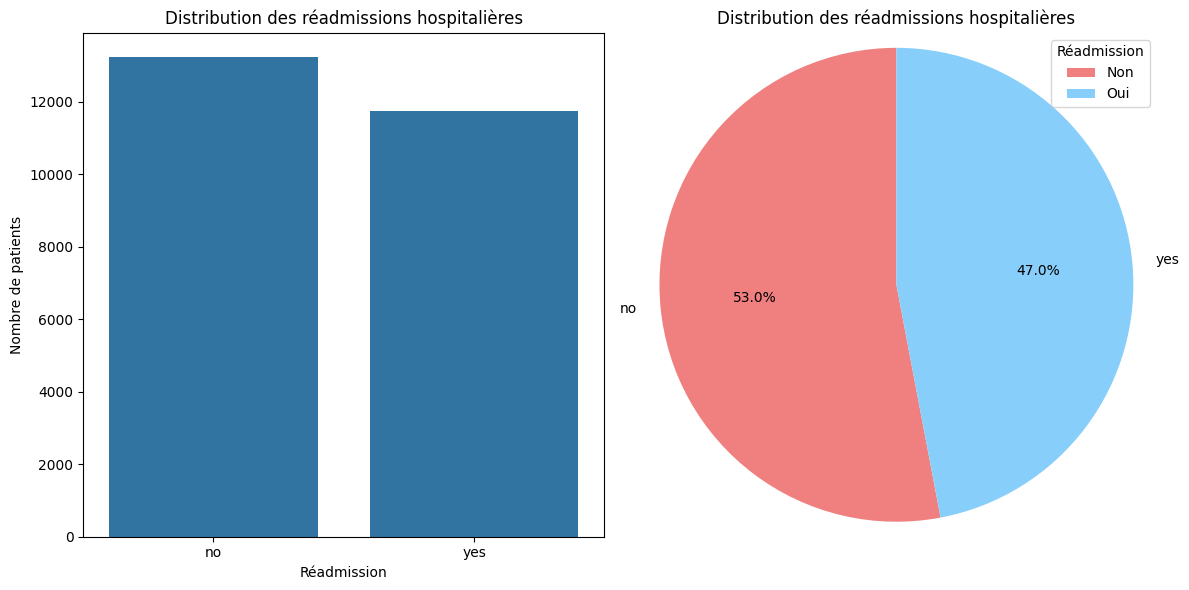

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Crée 2 sous-graphes

# Distribution de la variable cible (readmitted)\n",
sns.countplot(x='readmitted', data=df,  ax=axes[0]),
axes[0].set_title('Distribution des réadmissions hospitalières'),
axes[0].set_xlabel('Réadmission'),
axes[0].set_ylabel('Nombre de patients'),


# Diagramme circulaire de la distribution des réadmissions
readmission_counts = df['readmitted'].value_counts()
axes[1].pie(
    readmission_counts,
    labels=readmission_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral', 'lightskyblue']
)
axes[1].set_title('Distribution des réadmissions hospitalières')
axes[1].axis('equal')  # Pour un cercle parfait
axes[1].legend(title='Réadmission', labels=['Non','Oui'])

plt.tight_layout()
plt.show()

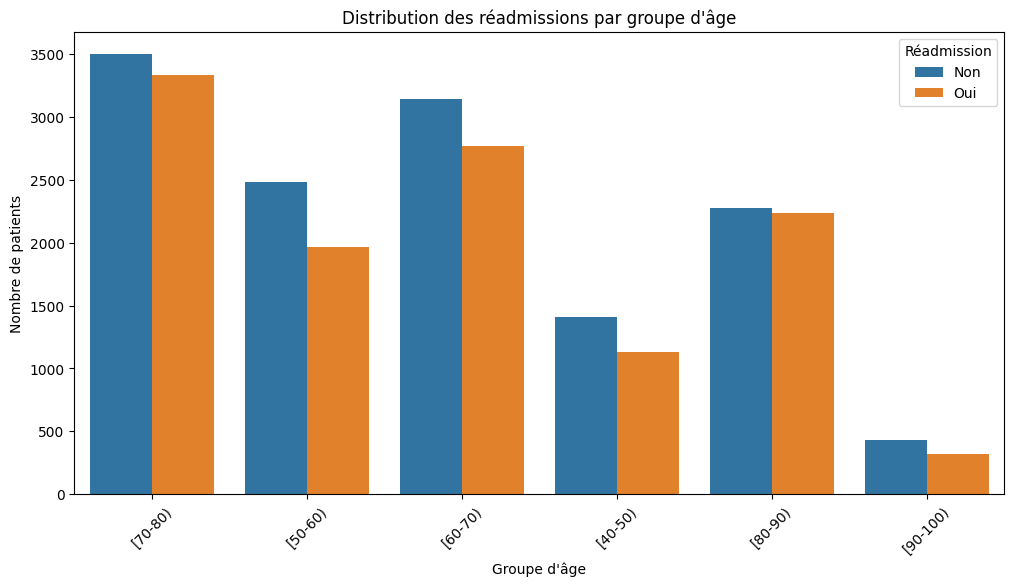

In [17]:
# Distribution des réadmissions par groupe d'âge
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age', hue='readmitted')
plt.title('Distribution des réadmissions par groupe d\'âge')
plt.xlabel('Groupe d\'âge')
plt.ylabel('Nombre de patients')
plt.xticks(rotation=45)
plt.legend(title='Réadmission', labels=['Non', 'Oui'])
plt.show()


Ce graphique montre que les patients âgés de 70-80 ans ont le plus grand nombre de réadmissions, 
suivi des patients de 60-70 ans. Cela suggère que l'âge avancé pourrait être un facteur de risque de réadmission.

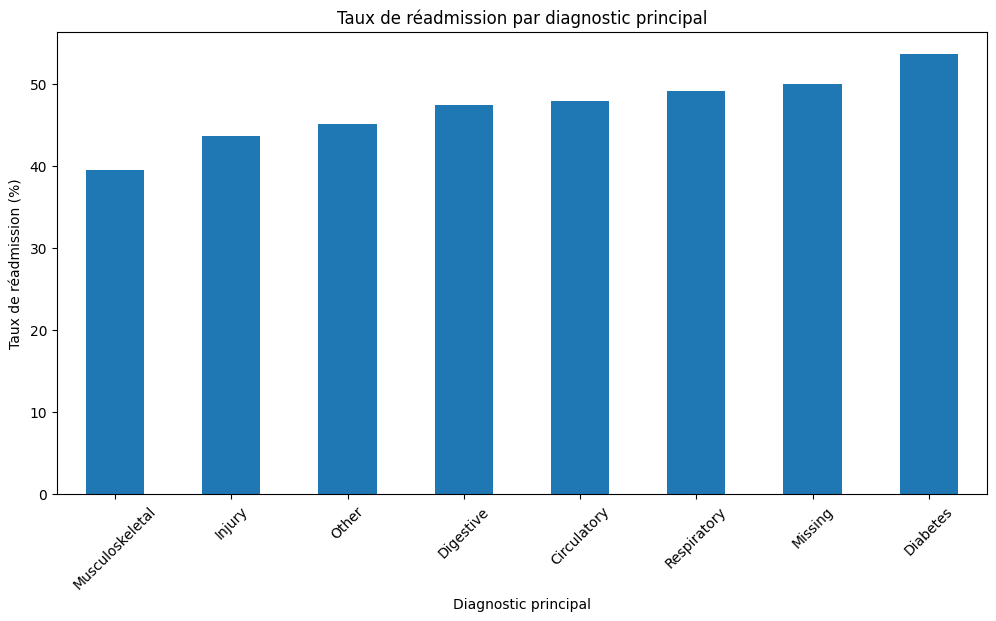

In [4]:
# Taux de réadmission par diagnostic principal
plt.figure(figsize=(12, 6))
readmission_by_diag = df.groupby('diag_1')['readmitted'].apply(lambda x: (x == 'yes').mean() * 100)
readmission_by_diag.sort_values().plot(kind='bar')
plt.title('Taux de réadmission par diagnostic principal')
plt.xlabel('Diagnostic principal')
plt.ylabel('Taux de réadmission (%)')
plt.xticks(rotation=45)
plt.show()

Les patients avec un diagnostic de diabète ont le taux de réadmission le plus élevé (53.6%), 
suivi des patients avec des problèmes respiratoires (49.1%). Cela indique que certaines conditions médicales 
sont plus susceptibles de conduire à une réadmission.

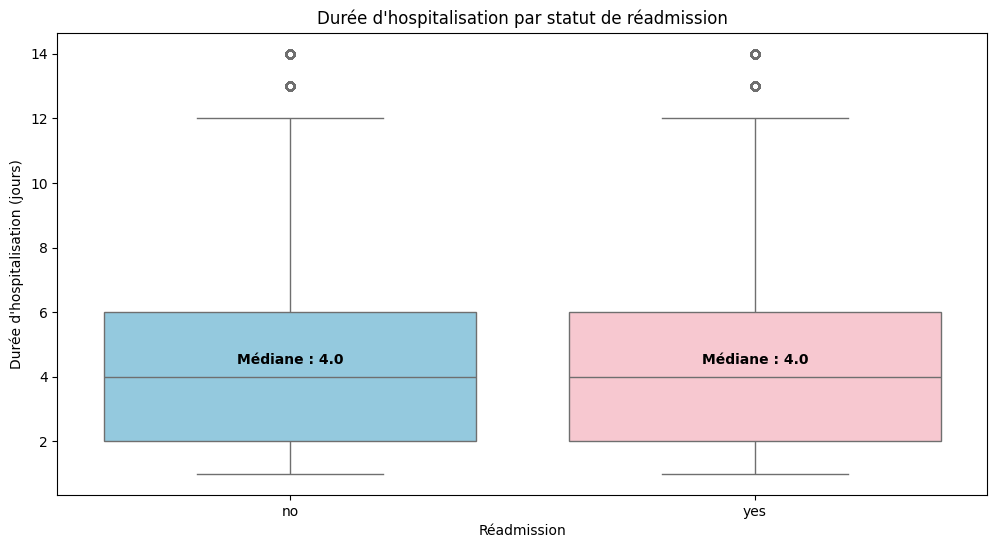

In [22]:
# Relation entre durée d'hospitalisation et réadmission
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='readmitted', y='time_in_hospital', palette={'yes': 'pink', 'no': 'skyblue'})
# Ajouter les médianes manuellement
group_medians = df.groupby('readmitted')['time_in_hospital'].median()
for i, (label, median) in enumerate(group_medians.items()):
    plt.text(
        x=i,
        y=median + 0.3,  # Légèrement au-dessus de la ligne médiane
        s=f"Médiane : {median:.1f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )
plt.title('Durée d\'hospitalisation par statut de réadmission')
plt.xlabel('Réadmission')
plt.ylabel('Durée d\'hospitalisation (jours)')

plt.show()

La médiane de la durée d’hospitalisation est identique (4 jours) pour les patients réadmis et non réadmis, ce qui signifie que la valeur centrale est la même dans les deux groupes.

En conclusion, la médiane identique ne suffit pas à elle seule pour exclure une différence entre les groupes, car la distribution complète des données révèle des distinctions importantes entre patients réadmis et non réadmis.

In [23]:
# Séparer les deux groupes
group_yes = df[df['readmitted'] == 'yes']['time_in_hospital']
group_no = df[df['readmitted'] == 'no']['time_in_hospital']

# Test de Mann–Whitney U
stat, p_value = mannwhitneyu(group_yes, group_no, alternative='two-sided')

# Affichage du résultat
print(f"Statistique U : {stat}")
print(f"p-value : {p_value:.4f}")

if p_value < 0.05:
    print("✅ La différence est statistiquement significative (p < 0.05).")
else:
    print("❌ Aucune différence significative détectée (p ≥ 0.05).")

Statistique U : 82650781.5
p-value : 0.0000
✅ La différence est statistiquement significative (p < 0.05).


Le test de Mann-Whitney U indique une différence statistiquement significative entre les distributions des durées d’hospitalisation. Cela signifie que, même si la médiane est la même, les deux groupes diffèrent dans la répartition globale des valeurs — par exemple, dans la dispersion ou la forme des distributions.

Autrement dit, la différence significative pourrait être liée à des variations dans les extrêmes (séjours très courts ou très longs) ou à une asymétrie différente dans un groupe par rapport à l’autre.

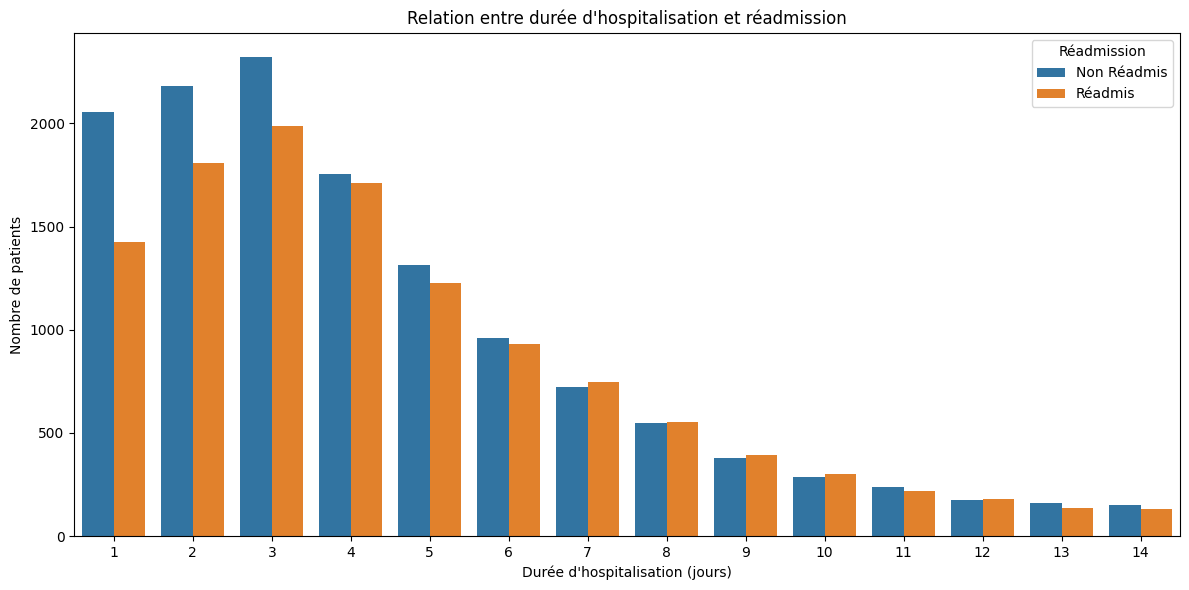

In [25]:
# Relation entre la durée d'hospitalisation et la réadmission
plt.figure(figsize=(12, 6))
sns.countplot(x='time_in_hospital', hue='readmitted', data=df)
plt.title('Relation entre durée d\'hospitalisation et réadmission')
plt.xlabel('Durée d\'hospitalisation (jours)')
plt.ylabel('Nombre de patients')
plt.legend(title='Réadmission', labels=['Non Réadmis', 'Réadmis'])
plt.tight_layout()
plt.show()

Pour les courtes durées d’hospitalisation (1 à 4 jours), les patients non réadmis sont significativement plus nombreux que les réadmis.

À partir de 7 jours, la différence entre les deux groupes se réduit, et on observe même une inversion légère où les réadmis sont parfois plus nombreux ou quasi équivalents aux non réadmis.

On note également une diminution générale du nombre total de patients au fur et à mesure que la durée d'hospitalisation augmente.


Les patients réadmis ont tendance à avoir des durées d'hospitalisation plus longues que ceux non réadmis, particulièrement à partir de 7 jours. Cela peut indiquer que des hospitalisations prolongées sont associées à des cas plus complexes ou graves, **augmentant le risque de réadmission**.

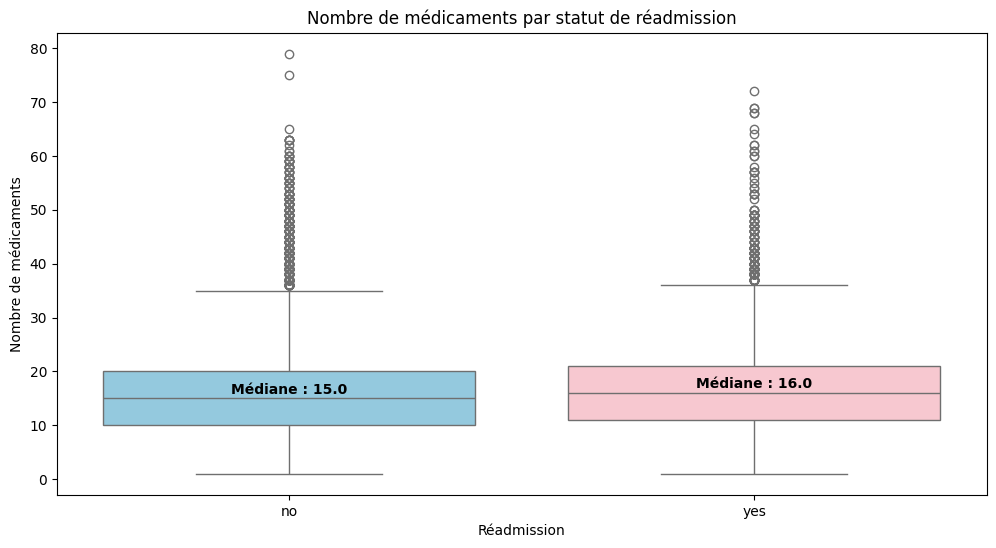

In [12]:
# Impact du nombre de médicaments sur la réadmission
group_medianss = df.groupby('readmitted')['n_medications'].median()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='readmitted', y='n_medications', palette={'yes': 'pink', 'no': 'skyblue'})
plt.title('Nombre de médicaments par statut de réadmission')
plt.xlabel('Réadmission')
plt.ylabel('Nombre de médicaments')
for i, (label, median) in enumerate(group_medianss.items()):
    plt.text(
        x=i,
        y=median + 0.3,  # Légèrement au-dessus de la ligne médiane
        s=f"Médiane : {median:.1f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )
plt.show()

Les patients réadmis ont tendance à prendre plus de médicaments (médiane de 16) que ceux qui ne sont pas réadmis (médiane de 15). Cela pourrait indiquer que la complexité du traitement médicamenteux est un facteur de risque de réadmission.

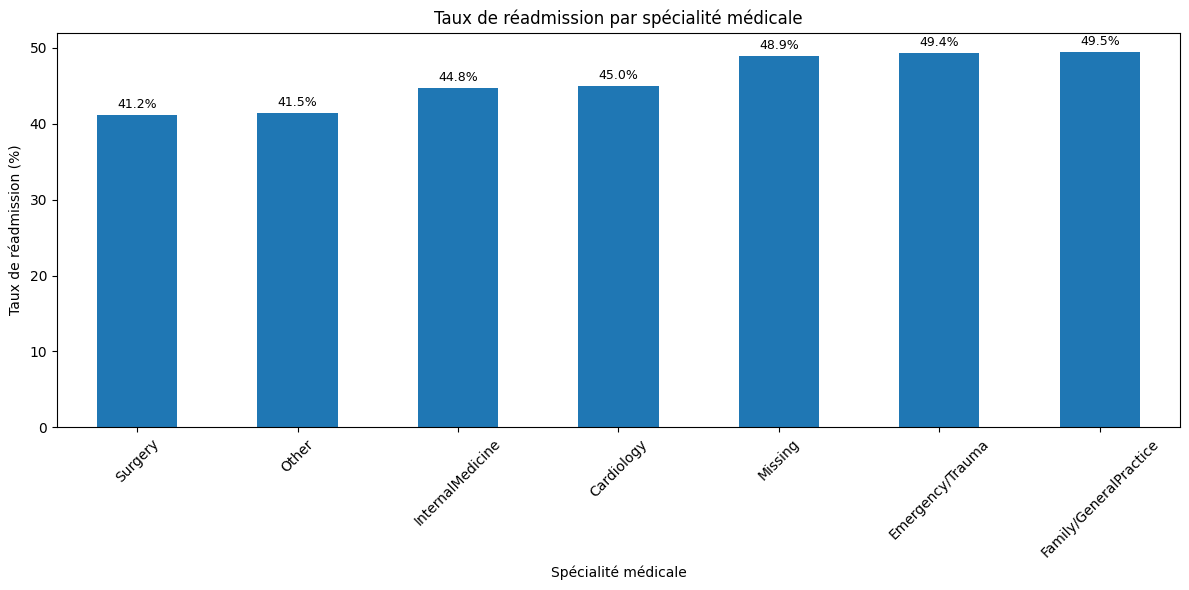

In [4]:
# Taux de réadmission par spécialité médicale
# Création de la figure
plt.figure(figsize=(12, 6))

# Calcul du taux de réadmission
readmission_by_specialty = df.groupby('medical_specialty')['readmitted'].apply(lambda x: (x == 'yes').mean() * 100)
readmission_by_specialty = readmission_by_specialty.sort_values()

# Tracé du bar chart
ax = readmission_by_specialty.plot(kind='bar')

# Titre et axes
plt.title('Taux de réadmission par spécialité médicale')
plt.xlabel('Spécialité médicale')
plt.ylabel('Taux de réadmission (%)')
plt.xticks(rotation=45)

# Ajout des pourcentages sur chaque barre
for i, value in enumerate(readmission_by_specialty):
    ax.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Ce graphique met en évidence des variations significatives du taux de réadmission selon la spécialité médicale. Certaines spécialités présentent des taux de réadmission plus élevés, ce qui peut refléter une plus grande complexité des cas cliniques traités, des pathologies chroniques nécessitant un suivi rapproché, ou encore des différences dans les protocoles de soins et de sortie. Ces écarts soulignent l’importance d’adapter les stratégies de prise en charge et de suivi post-hospitalisation en fonction des spécialités.

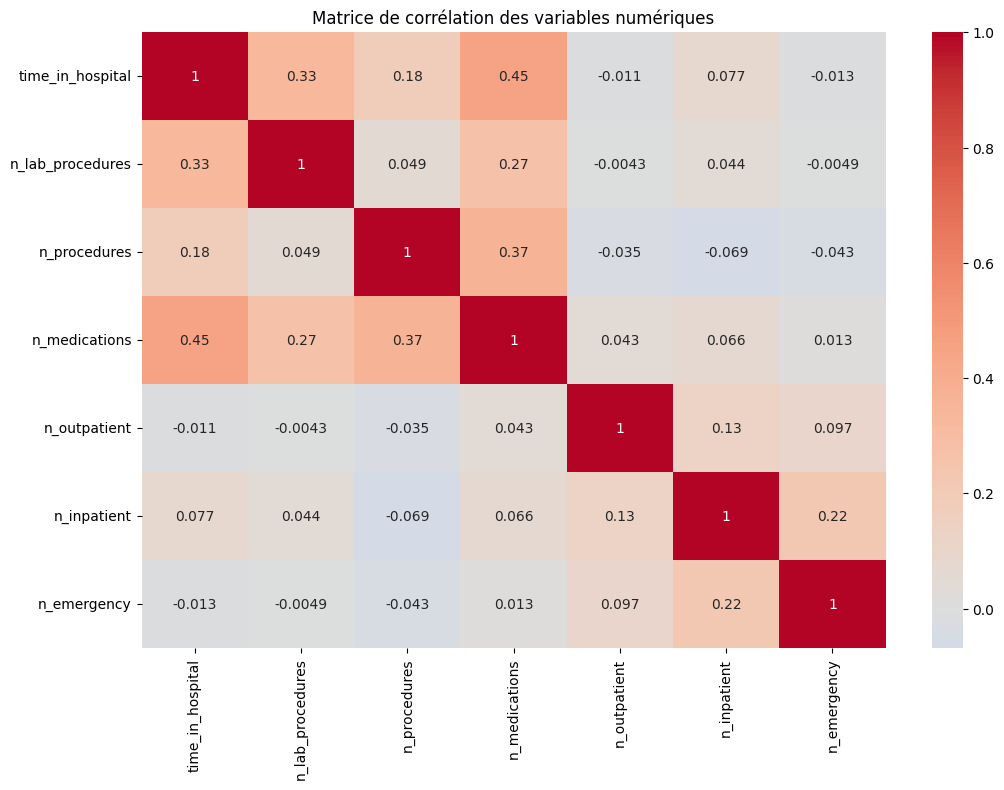

In [22]:
# Matrice de corrélation des variables numériques
plt.figure(figsize=(12, 8))
numeric_cols = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 
                'n_outpatient', 'n_inpatient', 'n_emergency']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation des variables numériques')
plt.show()

Cette matrice de corrélation montre les relations entre les différentes variables numériques. 
Les corrélations fortes (proches de 1 ou -1) indiquent des relations importantes entre les variables, ce qui peut aider à identifier les facteurs qui influencent ensemble la réadmission.

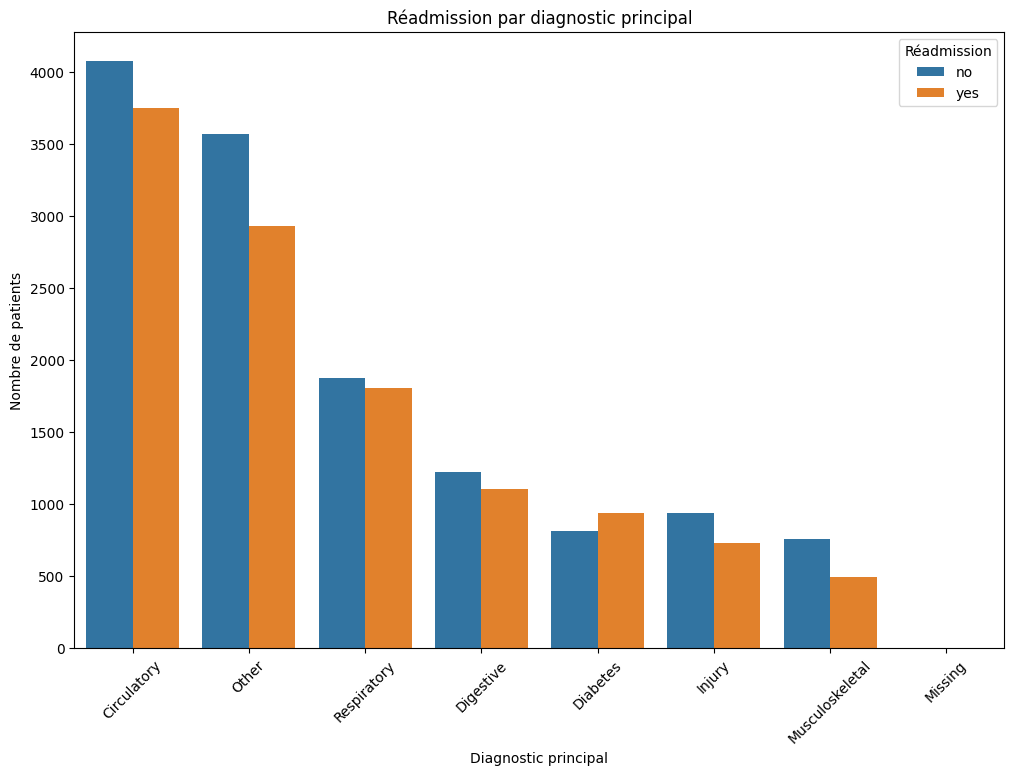

In [6]:
# Sélection des 10 diagnostics les plus fréquents chez les patients réadmis
top_diagnostics = df[df['readmitted'] == 'yes']['diag_1'].value_counts().nlargest(10).index

# Filtrer les données pour ne garder que ces diagnostics
filtered_data = df[df['diag_1'].isin(top_diagnostics)]

# Ajustement de la taille de la figure
plt.figure(figsize=(12, 8))

# Countplot pour visualiser les réadmissions en fonction des diagnostics principaux
sns.countplot(data=filtered_data, x='diag_1', hue='readmitted', order=top_diagnostics)

# Titres et labels
plt.title("Réadmission par diagnostic principal")
plt.xlabel("Diagnostic principal")
plt.ylabel("Nombre de patients")
plt.legend(title="Réadmission", loc='upper right')
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()


Les diagnostics principaux des patients réadmis sont majoritairement liés au système circulatoire, aux troubles respiratoires, et au diabète, avec un risque de réadmission particulièrement élevé pour les problèmes circulatoires, nécessitant souvent un suivi régulier.

<Figure size 500x600 with 0 Axes>

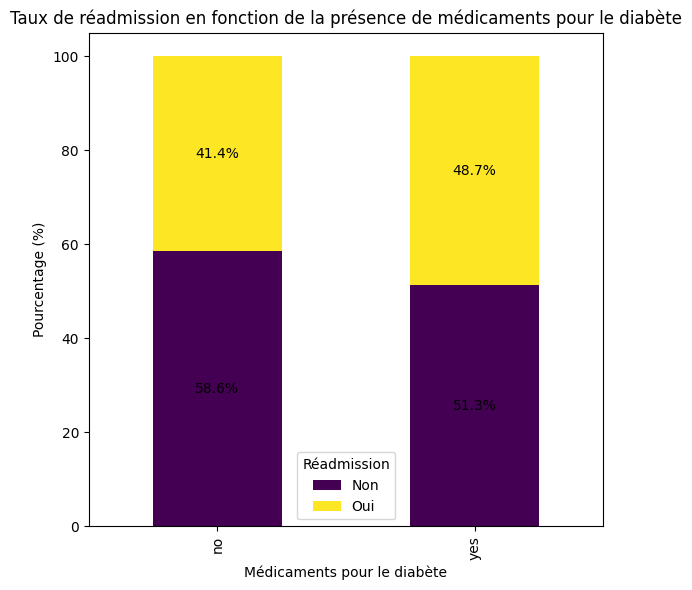

In [17]:

plt.figure(figsize=(5, 6))

# Calcul des pourcentages
diabetes_med_readmission = pd.crosstab(df['diabetes_med'], df['readmitted'], normalize='index') * 100

# Création du graphique
ax = diabetes_med_readmission.plot(
    kind='bar', 
    stacked=True, 
    colormap='viridis',
    figsize=(6, 6)
)

plt.title("Taux de réadmission en fonction de la présence de médicaments pour le diabète")
plt.xlabel("Médicaments pour le diabète")
plt.ylabel("Pourcentage (%)")
plt.legend(title='Réadmission', labels=['Non', 'Oui'])
plt.tight_layout()

# Ajout des pourcentages sur les barres
for i, (index, row) in enumerate(diabetes_med_readmission.iterrows()):
    bottom = 0
    for j, value in enumerate(row):
        ax.text(i, bottom + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=10, color='black')
        bottom += value

plt.show()


Le pourcentage de réadmission est plus élevé chez les patients qui prennent des médicaments pour le diabète (yes) par rapport à ceux qui n'en prennent pas (no).

Cela suggère un lien entre la prise de médicaments pour le diabète et un risque accru de réadmission.

Ce phénomène peut s'expliquer par la nature chronique et les complications du diabète, qui augmentent la probabilité de complications post-hospitalisation.

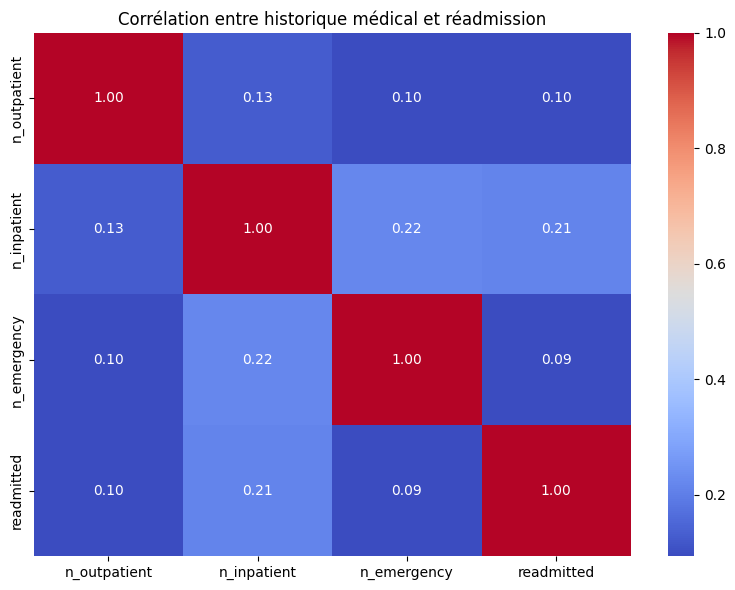

In [16]:
# Encoder la variable cible : 'yes' -> 1, 'no' -> 0
df["readmitted"] = df["readmitted"].apply(lambda x: 1 if x == "yes" else 0)

# Garder uniquement les colonnes pertinentes pour la corrélation
corr_features = ["n_outpatient", "n_inpatient", "n_emergency", "readmitted"]
corr_matrix = df[corr_features].corr()

# Plot Heatmap de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre historique médical et réadmission")
plt.tight_layout()
plt.show()


Les hospitalisations (n_inpatient) présentent la corrélation positive la plus forte avec les réadmissions (0.21). Cela suggère qu’un patient ayant déjà été hospitalisé a une probabilité plus élevée d’être réadmis.

Les urgences (n_emergency) montrent une corrélation très faible avec les réadmissions (0.09), ce qui indique un lien négligeable dans ce contexte.

Les consultations externes (n_outpatient) présentent également une corrélation très faible (0.10), suggérant peu ou pas de relation directe avec les réadmissions.

Parmi les trois types de prise en charge analysés, l’hospitalisation se distingue comme le facteur le plus associé aux réadmissions. Les visites en urgence ou en consultation externe semblent, quant à elles, avoir un impact limité sur le risque de réadmission.

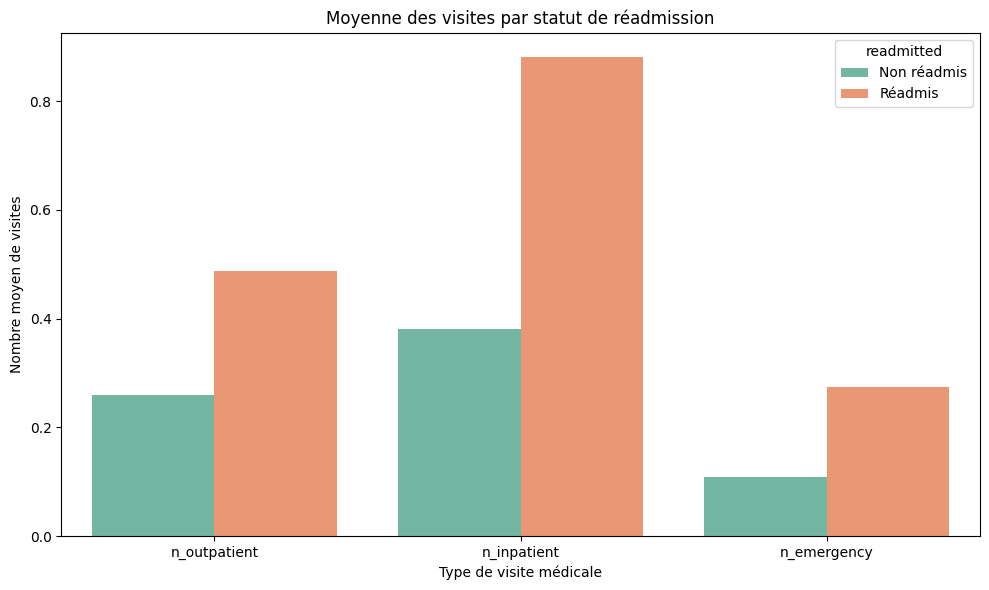

In [19]:

# Préparer les données pour le barplot : moyenne par groupe de réadmission
grouped_means = df.groupby("readmitted")[["n_outpatient", "n_inpatient", "n_emergency"]].mean().reset_index()
grouped_means["readmitted"] = grouped_means["readmitted"].map({0: "Non réadmis", 1: "Réadmis"})

# Transformation en format long pour seaborn
melted = grouped_means.melt(id_vars="readmitted", var_name="Type de visite", value_name="Moyenne")

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x="Type de visite", y="Moyenne", hue="readmitted", palette="Set2")
plt.title("Moyenne des visites par statut de réadmission")
plt.ylabel("Nombre moyen de visites")
plt.xlabel("Type de visite médicale")
plt.tight_layout()
plt.show()

Les patients ayant eu plus d’hospitalisations ou de passages aux urgences présentent un risque plus élevé de réadmission, indiquant une pathologie plus grave ou mal suivie. 

En revanche, un suivi ambulatoire plus régulier semble légèrement associé à une diminution du risque. 

Ces résultats soulignent l’importance d’un bon suivi médical en externe pour réduire les réadmissions.

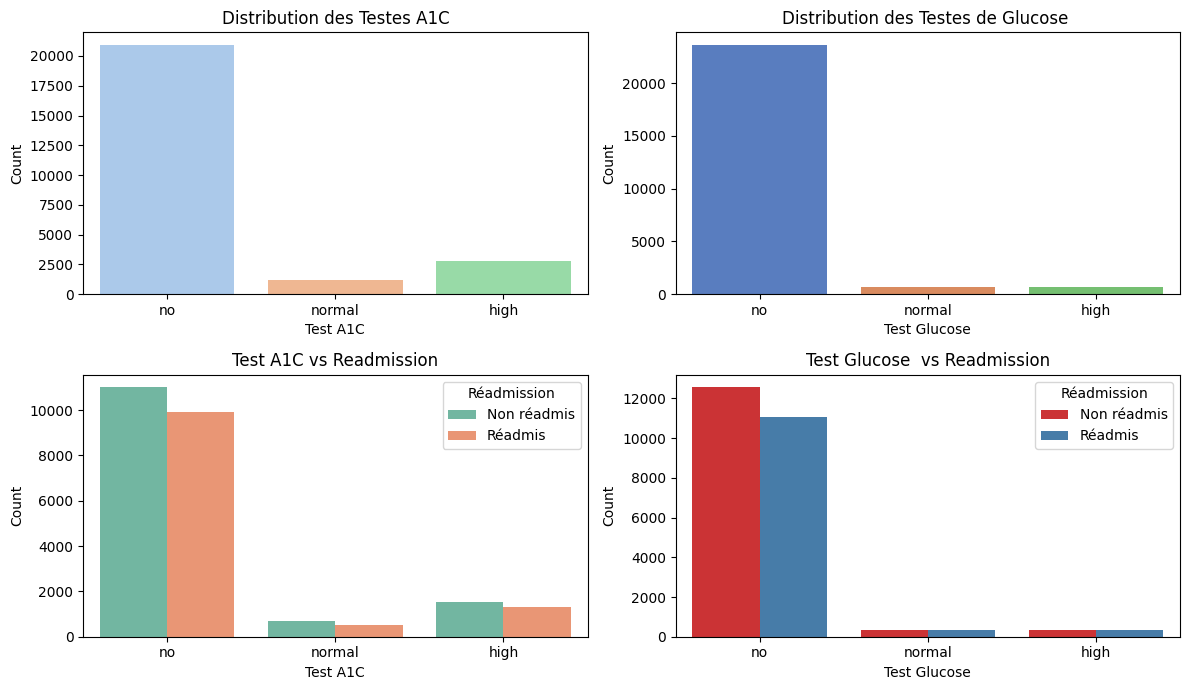

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7))  

# Plot 1: Distribution of A1Ctest results
sns.countplot(ax=axes[0, 0], x="A1Ctest", data=df, palette="pastel")
axes[0, 0].set_title("Distribution des Testes A1C")
axes[0, 0].set_xlabel("Test A1C")
axes[0, 0].set_ylabel("Count")

# Plot 2: Distribution des Testes de Glucose 
sns.countplot(ax=axes[0, 1], x="glucose_test", data=df, palette="muted")
axes[0, 1].set_title("Distribution des Testes de Glucose ")
axes[0, 1].set_xlabel("Test Glucose")
axes[0, 1].set_ylabel("Count")

# Plot 3: A1Ctest vs Readmission
sns.countplot(ax=axes[1, 0], x="A1Ctest", hue="readmitted", data=df, palette="Set2")
axes[1, 0].set_title("Test A1C vs Readmission")
axes[1, 0].set_xlabel("Test A1C")
axes[1, 0].set_ylabel("Count")

# Légende personnalisée pour plot 3
handles, labels = axes[1, 0].get_legend_handles_labels()
axes[1, 0].legend(handles=handles, labels=["Non réadmis", "Réadmis"], title="Réadmission")

# Plot 4: Test Glucose  vs Readmission
sns.countplot(ax=axes[1, 1], x="glucose_test", hue="readmitted", data=df, palette="Set1")
axes[1, 1].set_title("Test Glucose  vs Readmission")
axes[1, 1].set_xlabel("Test Glucose")
axes[1, 1].set_ylabel("Count")

# Légende personnalisée pour plot 4
handles, labels = axes[1, 1].get_legend_handles_labels()
axes[1, 1].legend(handles=handles, labels=["Non réadmis", "Réadmis"], title="Réadmission")


plt.tight_layout()  # Pour éviter que les titres et labels se chevauchent
plt.show()

Peu de patients passent les tests A1C ou de glycémie, ce qui suggère un suivi médical incomplet dans de nombreux cas.

Les patients ayant des résultats A1C ou glycémiques élevés présentent un taux de réadmission plus élevé.

Il existe une corrélation entre mauvais contrôle glycémique et risque de réadmission, soulignant l’importance d’un suivi régulier du diabète.

Les résultats montrent que les **tests A1C** et de **glycémie** influencent significativement le taux de réadmission des patients.

En particulier, les patients présentant des valeurs élevées à ces tests sont plus susceptibles d’être réadmis. Cette relation suggère que le mauvais contrôle glycémique est un facteur de risque important de réadmission, et met en évidence l’importance d’un dépistage régulier et d’un suivi médical rigoureux pour réduire les réadmissions évitables.

### Conclusion 

L’analyse des données met en évidence plusieurs facteurs influençant significativement le risque de réadmission des patients. 

Tout d’abord, **les facteurs démographiques**, notamment l’âge, jouent un rôle important, les patients plus âgés étant généralement plus à risque.

Ensuite, **les facteurs cliniques** tels que **la durée d’hospitalisation**, **la nature des diagnostics** établis, et **le nombre de médicaments** prescrits témoignent de la complexité de l’état de santé du patient et influencent directement la probabilité de réadmission. 

Concernant **les facteurs liés au diabète**, les patients ayant eu un changement de médication durant leur séjour présentent un taux de réadmission significativement plus élevé, et la présence de médicaments pour le diabète est elle aussi associée à un risque accru.

Enfin, **l’historique médical**, incluant le nombre de visites aux urgences, d’hospitalisations antérieures et de consultations externes, constitue un indicateur fort de la stabilité du patient et de la qualité du suivi. 

Une prise en charge coordonnée de ces différents aspects est donc essentielle pour réduire les taux de réadmission.